<a href="https://colab.research.google.com/github/yzuaa/Predicting-US-Housing-Listing-Price/blob/main/BA810_TeamA3_USA_housing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab link: https://colab.research.google.com/drive/1t11ADCacuQlwvL1omOZL3F4gMBTlmcDB?usp=sharing

# **<font color='SteelBlue'><center>BA810 Team3 Predicting U.S. Housing Listing Price</center></span>**
### **<font color='SteelBlue'><center>Team Members: Yunxi Cheng (Claire), Yuhan Zu, Robert Zhang**

<img src="https://user-images.githubusercontent.com/94079366/205769264-0528a012-f0cc-4ed8-b5c3-92f5c9d0ff73.png" width="500" align="left"/>


---
## **<a id="Content">Table of Content</a>**

1. [**<span>Project Objective and Data Source</span>**](#ProjectOverview)
1. [**<span>Exploratory Data Analysis</span>**](#EDA)
1. [**<span>Part1: Data Visualization and Insights</span>**](#Part1)
1. [**<span>Part2: Machine Learning Models and Results</span>**](#Part2)
1. [**<span>Conclusion & Recommendations</span>**](#Rec)
---

---
## **Project Objective and Data Source**

**➣ Data Source:** Zillow allows free listings of homes for sale by owners or agents. Zillow’s online and mobile search tools, including its smartphone app, let users search for a property and view estimated property values for free. We obtained our dataset from a contributor on Kaggle who compiled sales data on the United States states as a whole instead of isolated urban housing markets. Data description and source can be find  [here](https://www.kaggle.com/datasets/austinreese/usa-housing-listings).

***Note:*** Latest update: January 5th, 2020. Retail housing data across 50 states in the US and Washington D.C.

**➣ Problem Definition:**
- Rent hikes remain uncertain due to boom in home-sale prices, pricing people out of buying
- Rents have risen 25% over the past two years, pushing many renters beyond what they can now afford$^1$

*Source:* [Surging Rents Push More Americans to Live With Roommates or Parents](https://www.wsj.com/articles/inflation-driven-record-rents-mean-more-people-are-piling-in-with-roommates-11666671826) by The Wall Street Journal.

**➣ Project Objective:**
- Provide an overview of the US rental housing market
- Find which variables contribute most to monthly rents in populous US regions
- Help renters and sellers find ideal pricing points

**➣ Part 1:** EDA, data visualization, and geographic analysis.

**➣ Part 2:** Machine Learning models include linear regression, kNN, and decision trees.

---

# **Part 1: EDA and Visualization**

## **Data Exploration**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install matplotlib --upgrade
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
#plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA810_Team3_Share/Data/' #define directory where data is located in

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the raw data into colab
raw = pd.read_csv(data_folder+"housing.csv")
# show a preview of our raw data
raw.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [ ]:
# drop cols not needed
raw.drop(raw.filter(regex='url').columns, axis=1,inplace=True) # drop cols containing urls
housing = raw.drop(["region","description"],axis=1)
housing.info()
housing.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   price                    384977 non-null  int64  
 2   type                     384977 non-null  object 
 3   sqfeet                   384977 non-null  int64  
 4   beds                     384977 non-null  int64  
 5   baths                    384977 non-null  float64
 6   cats_allowed             384977 non-null  int64  
 7   dogs_allowed             384977 non-null  int64  
 8   smoking_allowed          384977 non-null  int64  
 9   wheelchair_access        384977 non-null  int64  
 10  electric_vehicle_charge  384977 non-null  int64  
 11  comes_furnished          384977 non-null  int64  
 12  laundry_options          305951 non-null  object 
 13  parking_options          244290 non-null  object 
 14  lat 

,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,7049044568,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,7049047186,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,7043634882,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,7049045324,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,7049043759,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


In [ ]:
# This cell handles null values in our original data
# Because null values lie in our categorical data about laundry and parking status, based on our understanding ,we decide to replace it with "no info"
print(housing.isnull().sum(),end="\n") # examine null values
housing['laundry_options'].fillna("no info", inplace=True) # replace null value
housing['parking_options'].fillna("no info", inplace=True) # replace null value

print("after fillna", housing.isnull().sum(), sep='\n')

id                              0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64
after fillna
id                            0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_opti

## **Summary Statistics & Visualization**


In [ ]:
# format to display value and percentage in pie charts
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [ ]:
housing = housing.drop(['id'], axis=1)
housing.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,no info,39.5357,-119.805,ca


In [ ]:
# IQR
Q1 = np.percentile(housing['price'], 25,
				interpolation = 'midpoint')
Q3 = np.percentile(housing['price'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", housing.shape)

# Upper bound
upper = np.where(housing['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(housing['price'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
housing.drop(upper[0], inplace = True)
housing.drop(lower[0], inplace = True)

print("New Shape: ", housing.shape)

Old Shape:  (384977, 16)
New Shape:  (366146, 16)


In [ ]:
print(housing['type'].unique(), end="  ", sep=" , ")

['apartment' 'condo' 'house' 'duplex' 'townhouse' 'loft' 'manufactured'
 'cottage/cabin' 'flat' 'in-law' 'land' 'assisted living']  

In [ ]:
housing['state'].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

In [ ]:
# removing prices that are null
housing_price = housing[housing['price']!=0]
housing_price['price'].describe()

count    364839.000000
mean       1092.220393
std         395.380242
min           1.000000
25%         800.000000
50%        1010.000000
75%        1333.000000
max        2279.000000
Name: price, dtype: float64

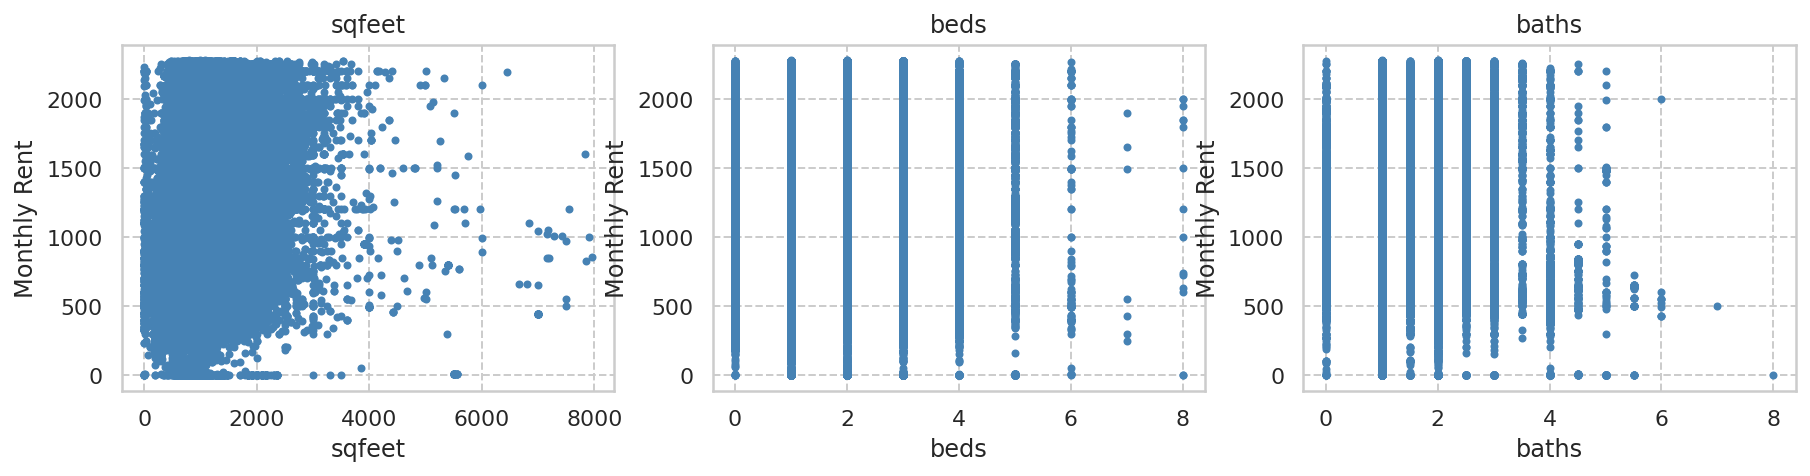

In [ ]:
# numeric variables scatterplots
# remove beds outliers and baths outliers

housing_price = housing[housing['price'] != 0]
housing_beds = housing_price[housing_price['beds'] < 1000]
housing_baths = housing_beds[housing_beds['baths'] < 20]
housing_final = housing_baths[housing_baths['sqfeet'] < 8000]

plt.figure(figsize = (15,7))
predictors=['sqfeet', 'beds', 'baths']
target=housing_final['price']

for i, col in enumerate(predictors):
    plt.subplot(2, len(predictors) , i+1)
    x = housing_final[col]
    y = target
    plt.rcParams['font.size'] = '18'
    plt.scatter(x, y, facecolors='steelblue', marker='.')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Monthly Rent')

In [ ]:
housing_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364748 entries, 0 to 384976
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    364748 non-null  int64  
 1   type                     364748 non-null  object 
 2   sqfeet                   364748 non-null  int64  
 3   beds                     364748 non-null  int64  
 4   baths                    364748 non-null  float64
 5   cats_allowed             364748 non-null  int64  
 6   dogs_allowed             364748 non-null  int64  
 7   smoking_allowed          364748 non-null  int64  
 8   wheelchair_access        364748 non-null  int64  
 9   electric_vehicle_charge  364748 non-null  int64  
 10  comes_furnished          364748 non-null  int64  
 11  laundry_options          364748 non-null  object 
 12  parking_options          364748 non-null  object 
 13  lat                      362968 non-null  float64
 14  long

Text(0.5, 1.0, 'Monthly Rent Distribution')

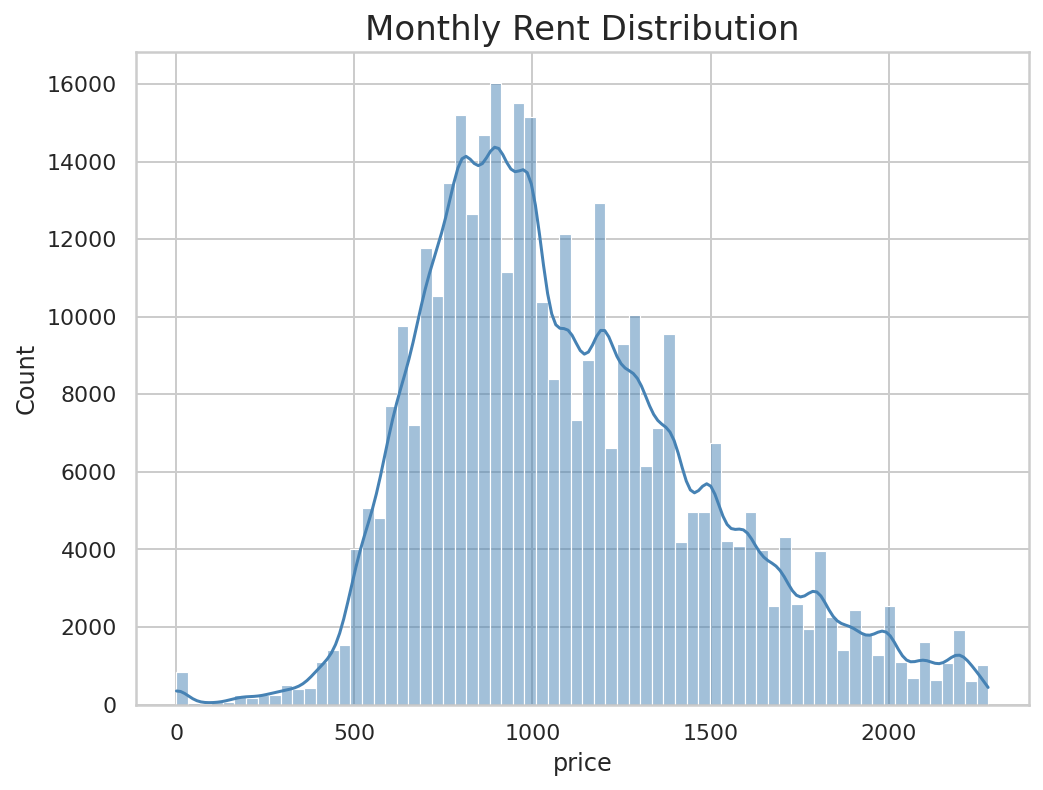

In [ ]:
# summary statistics on cols:  "price", after removing outliers
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

g1 = sns.histplot(data=housing_final['price'], bins=70, color='steelblue', legend=True, kde=True)
g1.set_title('Monthly Rent Distribution', fontdict={'fontsize':17})

In [ ]:
housing_final['price'].mode()

0    750
dtype: int64

Text(0.5, 0.98, 'Avg. Rent by State (Descending)')

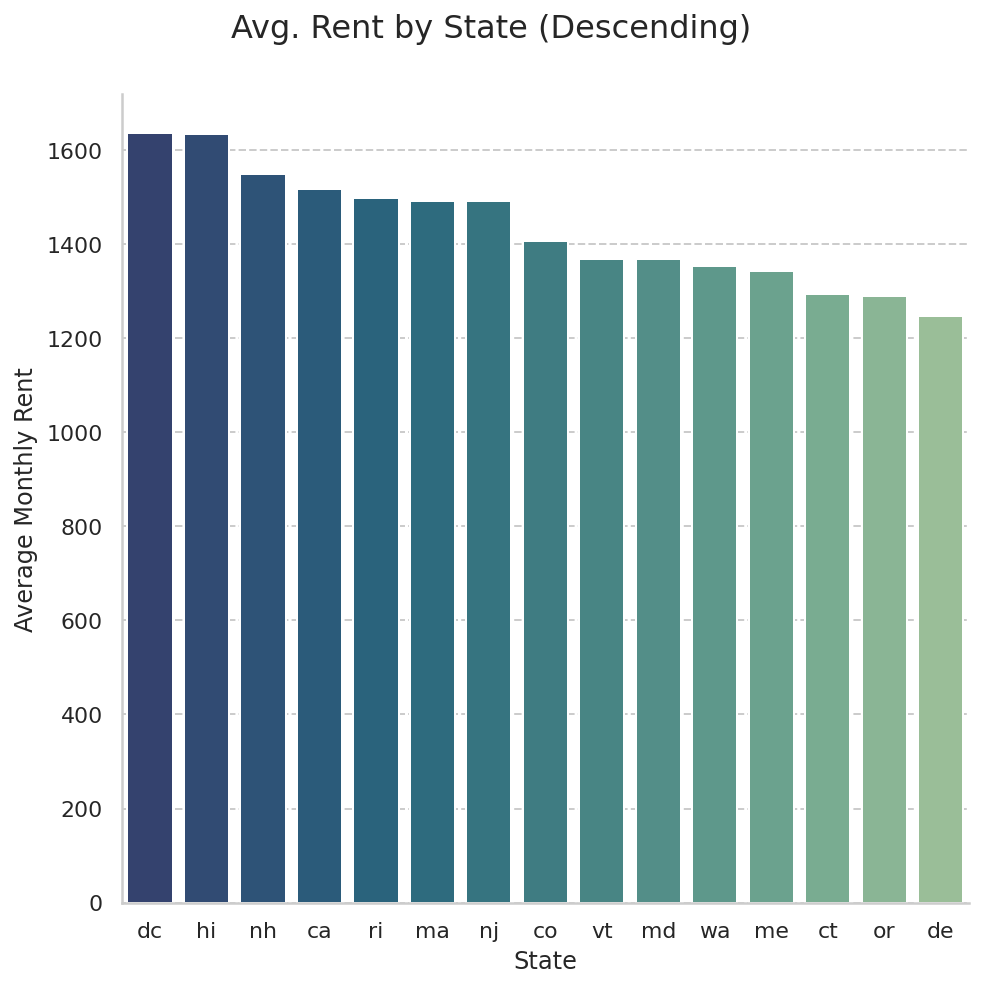

In [ ]:
# list median rent by state in descending order, choose the top 10 and do boxplots
avg_rent = housing_final.groupby('state')[['price']].agg('mean').reset_index()
rent_desc = avg_rent.sort_values(by=['price'], ascending=False).head(15)
rent_desc

# barplot of rent in descending order
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
g1 = sns.catplot(x='state', y='price', data=rent_desc,
                 kind='bar', palette='crest_r', height=7, aspect=1, ci=None);

g1.set(xlabel='State', ylabel='Average Monthly Rent')
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Avg. Rent by State (Descending)", fontsize = 16)

,price,state
0,1148,CA
1,1200,CA
2,1813,CA
3,1095,CA
4,289,CA
...,...,...
384972,1295,CA
384973,1549,CA
384974,1249,CA
384975,1429,CA


Text(0.5, 0.98, 'Total Number of Listings by State (Descending)')

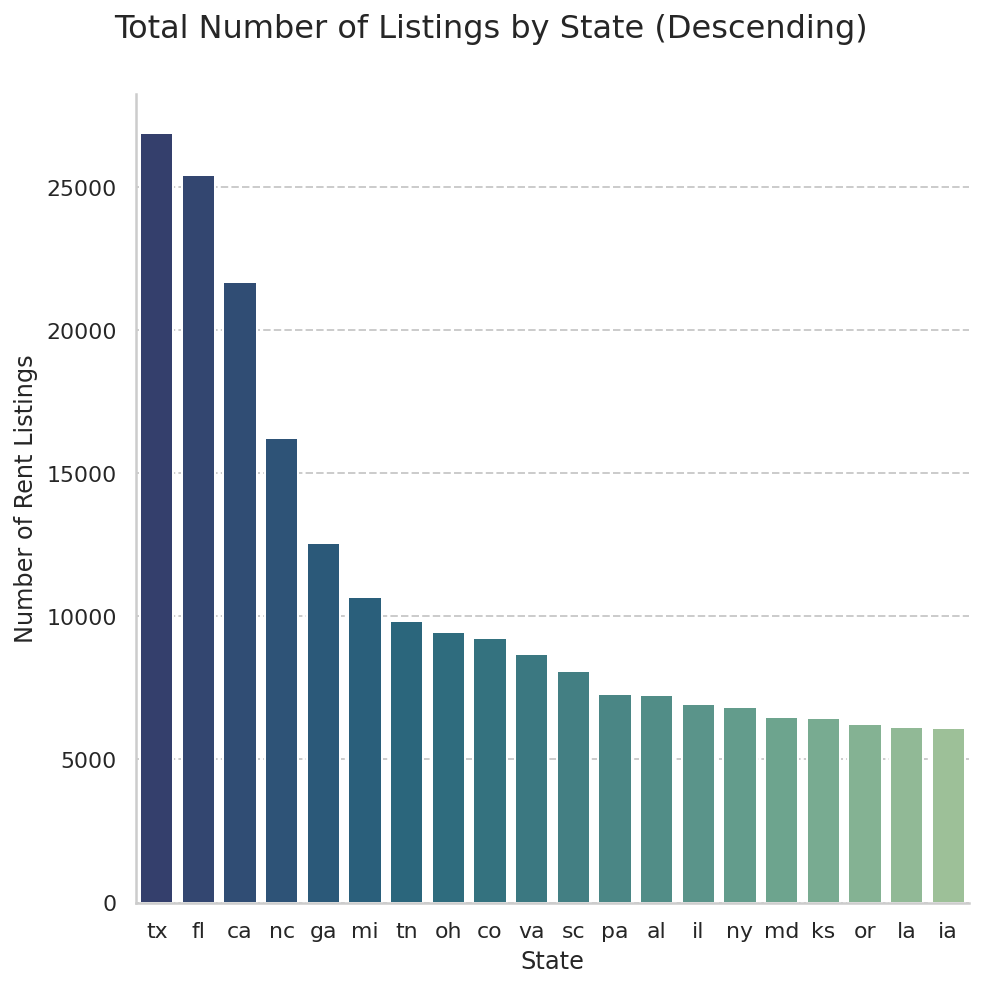

In [ ]:
# create price & state df
price_state = housing_final.filter(items=["price","state"])
price_state['state'] = price_state['state'].str.upper()
display(price_state)

listing_df = housing_final[housing_final["type"]=="apartment"]
population = listing_df.groupby('state')[['price']].agg('count').reset_index()
popu_desc = population.sort_values(by=['price'], ascending=False).head(20)

# barplot of rent in descending order
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

g2 = sns.catplot(x='state', y='price', data=popu_desc,
                 kind='bar', palette='crest_r', height=7, aspect=1, ci=None);

g2.set(xlabel='State', ylabel='Number of Rent Listings')
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Total Number of Listings by State (Descending)", fontsize = 16)

In [ ]:
rent_df1 = price_state[(price_state['state'] == 'DC')+(price_state['state'] == 'HI')+(price_state['state'] == 'NH')+(price_state['state'] == 'CA')+(price_state['state'] == 'RI')+(price_state['state'] == 'MA')]
rent_df1 # total of 35596 rows of unique values, states are capitalized

,price,state
0,1148,CA
1,1200,CA
2,1813,CA
3,1095,CA
4,289,CA
...,...,...
384972,1295,CA
384973,1549,CA
384974,1249,CA
384975,1429,CA


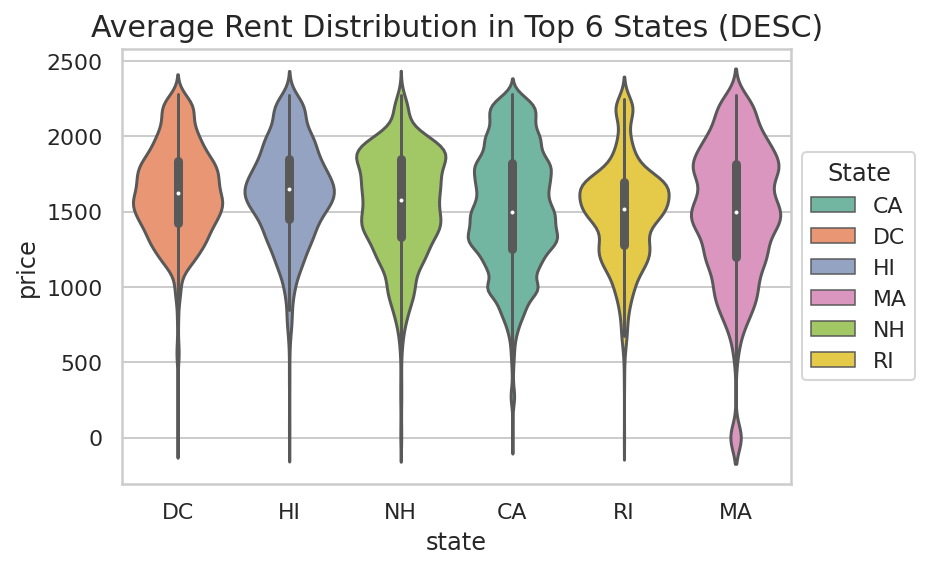

In [ ]:
# Violinplot of Top 6 Expensive States
sns.set(style="whitegrid")

rent_plot = sns.violinplot(x="state", y="price", hue="state", order = ['DC', 'HI', 'NH', 'CA', 'RI', 'MA'], data=rent_df1, palette="Set2", dodge=False)
plt.legend(title='State',loc='center left', bbox_to_anchor=(1, 0.5))
rent_plot.set_title('Average Rent Distribution in Top 6 States (DESC)', fontdict={'fontsize':15})
plt.savefig('rent violinplot.png', dpi = 400)

[267929, 98217]


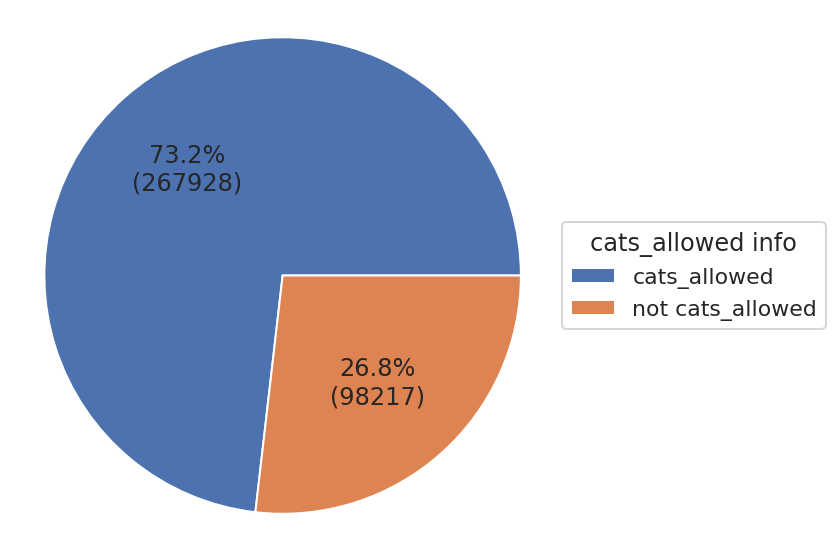

In [ ]:
# summary statistics on cols: "cats_allowed", "dogs_allowed", "smoking_allowed", "wheelchair_access"， "electric_vehicle_charge"
# "cats_allowed"
n_cats_allowed = (housing["cats_allowed"]==1).sum()
n_not_cats_allowed = (housing["cats_allowed"]==0).sum()
labels = "cats_allowed", "not cats_allowed"
counts = [n_cats_allowed,n_not_cats_allowed]
print(counts)
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="cats_allowed info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

[260666, 105480]


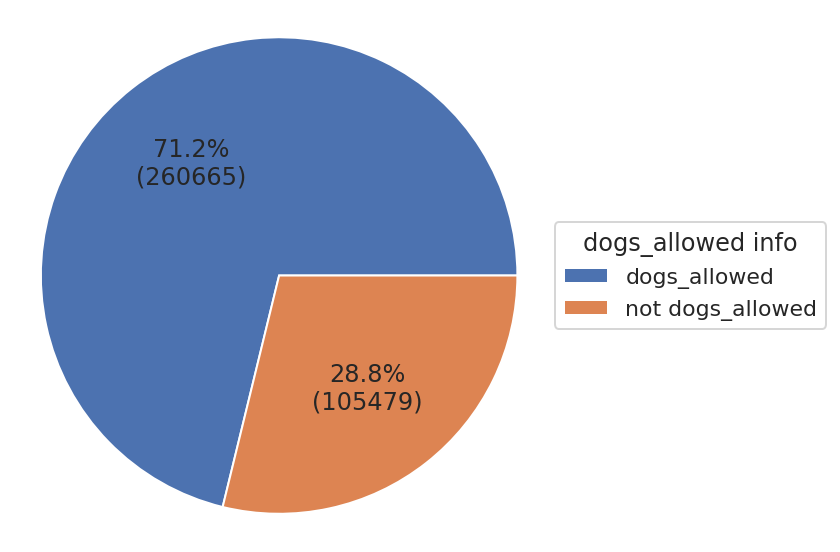

In [ ]:
# "dogs_allowed"
n_dogs_allowed = (housing["dogs_allowed"]==1).sum()
n_not_dogs_allowed = (housing["dogs_allowed"]==0).sum()
labels = "dogs_allowed", "not dogs_allowed"
counts = [n_dogs_allowed,n_not_dogs_allowed]
print(counts)
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="dogs_allowed info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

[271552, 94594]


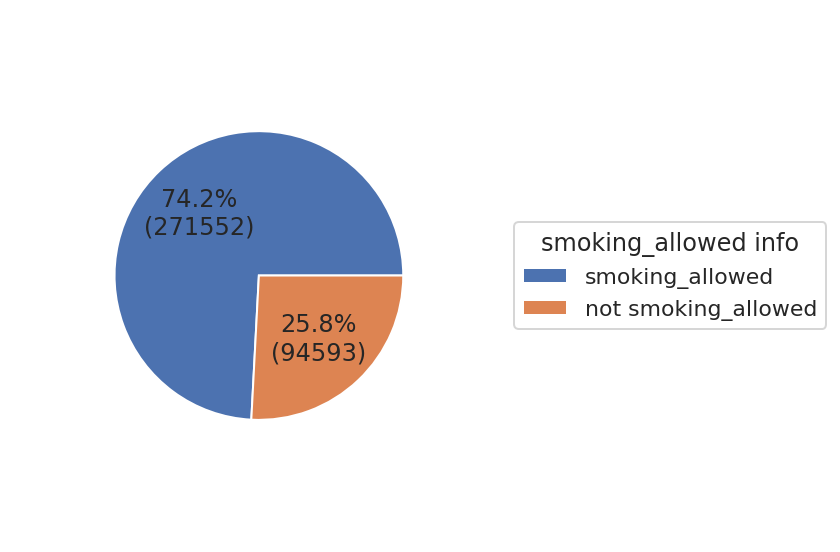

In [ ]:
# "smoking_allowed"
n_smoking_allowed = (housing["smoking_allowed"]==1).sum()
n_not_smoking_allowed = (housing["smoking_allowed"]==0).sum()
labels = "smoking_allowed", "not smoking_allowed"
counts = [n_smoking_allowed,n_not_smoking_allowed]
print(counts)
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="smoking_allowed info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

[28537, 337609]


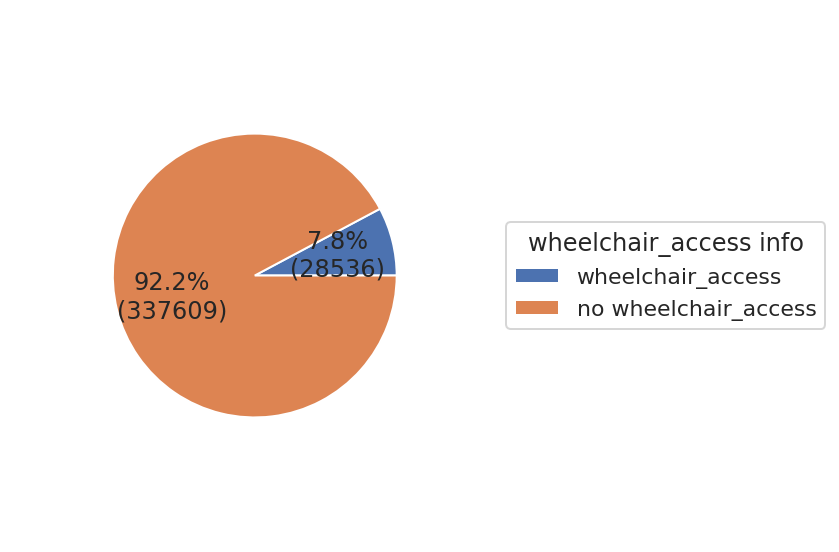

In [ ]:
# "wheelchair_access"
n_wheelchair_access = (housing["wheelchair_access"]==1).sum()
n_no_wheelchair_access = (housing["wheelchair_access"]==0).sum()
labels = "wheelchair_access", "no wheelchair_access"
counts = [n_wheelchair_access,n_no_wheelchair_access]
print(counts)
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="wheelchair_access info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

[3694, 362452]


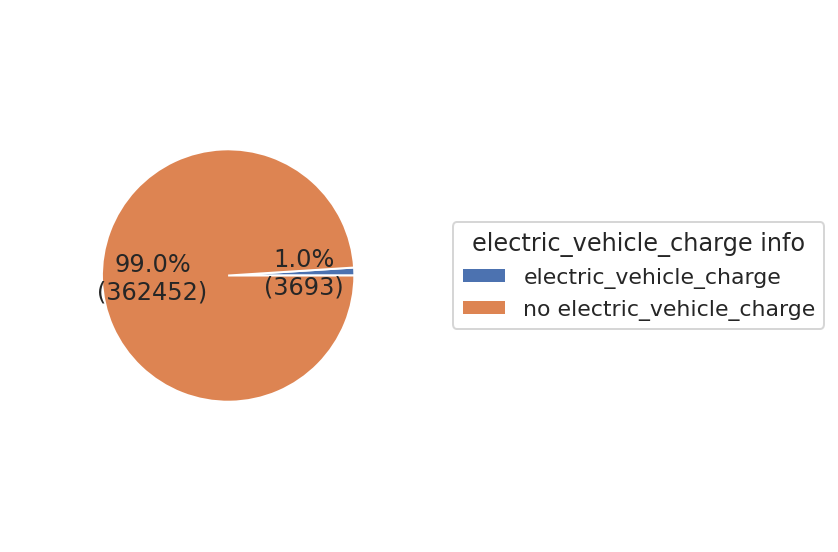

In [ ]:
# "electric_vehicle_charge"
n_electric_vehicle_charge = (housing["electric_vehicle_charge"]==1).sum()
n_no_electric_vehicle_charge = (housing["electric_vehicle_charge"]==0).sum()
labels = "electric_vehicle_charge", "no electric_vehicle_charge"
counts = [n_electric_vehicle_charge,n_no_electric_vehicle_charge]
print(counts)
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="electric_vehicle_charge info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

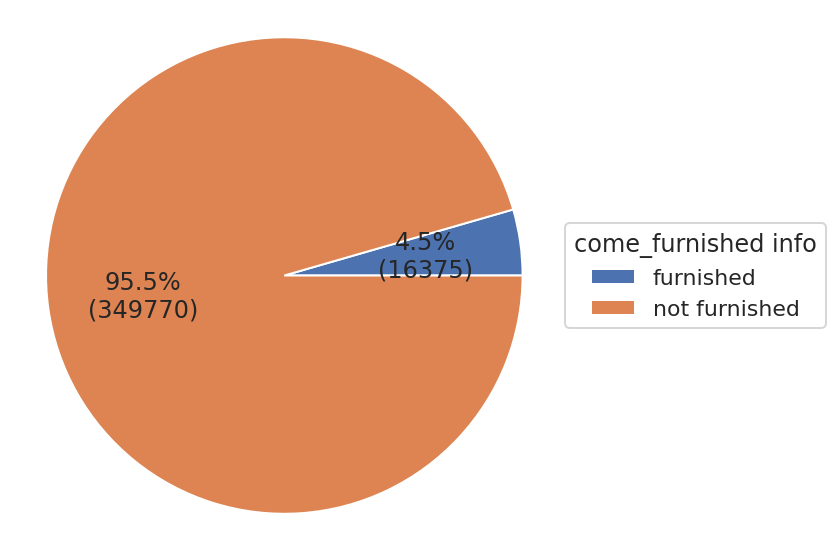

In [ ]:
# summary statistics on cols: "comes_furnished","laundry_options","parking_options","state"
# "comes_furnished"
n_furnished = (housing["comes_furnished"]==1).sum()
n_not_furnished = (housing["comes_furnished"]==0).sum()
labels = "furnished", "not furnished"
counts = [n_furnished,n_not_furnished]
fig1, ax1 = plt.subplots()

wedges,texts,autotexts = ax1.pie(counts,autopct= lambda pct: func(pct, counts))
ax1.legend(wedges, labels,
          title="come_furnished info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


      laundry info  counts
0      w/d in unit  120065
1          no info   76186
2      w/d hookups   74084
3  laundry on site   57515
4  laundry in bldg   34772
Stats: Counts by parking options
count         6.000000
mean      61024.333333
std       39734.166933
min        3524.000000
25%       40457.750000
50%       65799.500000
75%       75660.500000
max      120065.000000
Name: counts, dtype: float64


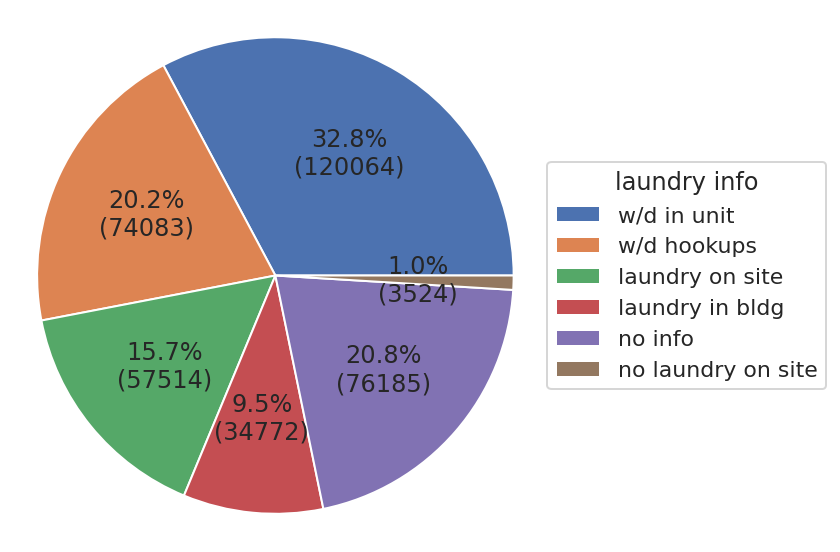

In [ ]:
# "laundry_options"
options = pd.unique(housing["laundry_options"])
counts_l = []
for i in options:
  counts_l.append((housing["laundry_options"]==i).sum())
# stats
d={"laundry info":options,"counts":counts_l}
df_count_by_laundry = pd.DataFrame(data=d)
df_count_by_laundry.sort_values(by=["counts"],inplace=True,ascending=False,ignore_index=True)
print(df_count_by_laundry.head(5))
print("Stats: Counts by parking options")
print(df_count_by_laundry["counts"].describe())

# visualization
labels_l = tuple(options)
fig2, ax2 = plt.subplots()
wedges, texts, autotexts=ax2.pie(counts_l,autopct= lambda pct: func(pct, counts_l))
ax2.legend(wedges, labels_l,
          title="laundry info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

         parking info  counts
0             no info  136093
1  off-street parking  125276
2             carport   36951
3     attached garage   34277
4     detached garage   15266
Stats: Counts by parking options
count         8.000000
mean      45768.250000
std       54077.001377
min         107.000000
25%       12133.500000
50%       24771.500000
75%       59032.250000
max      136093.000000
Name: counts, dtype: float64


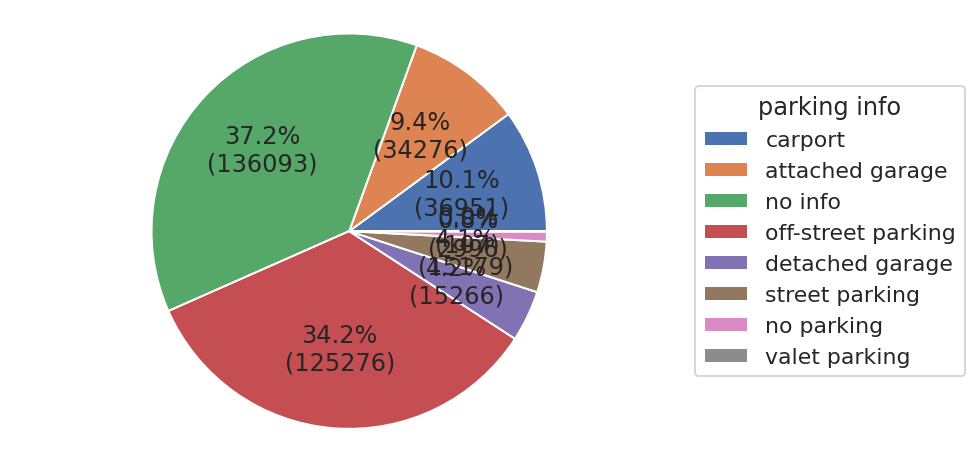

In [ ]:
# "parking_options"
options = pd.unique(housing["parking_options"])
counts_p = []
for i in options:
  counts_p.append((housing["parking_options"]==i).sum())
# stats
d={"parking info":options,"counts":counts_p}
df_count_by_parking = pd.DataFrame(data=d)
df_count_by_parking.sort_values(by=["counts"],inplace=True,ascending=False,ignore_index=True)
print(df_count_by_parking.head(5))
print("Stats: Counts by parking options")
print(df_count_by_parking["counts"].describe())
# visualization
labels_p = tuple(options)
fig3, ax3 = plt.subplots()
wedges, texts, autotexts=ax3.pie(counts_p,autopct= lambda pct: func(pct, counts_p))
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.legend(wedges, labels_p,
          title="parking info",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


In [ ]:
# "state"
options = pd.unique(housing["state"])
counts_s = []
avg_price = []
for i in options:
  counts_s.append((housing["state"]==i).sum())
  avg_price.append(housing.loc[housing["state"]==i,"price"].mean())
d={"state":options,"counts":counts_s,"avg price":avg_price}
df_count_by_states = pd.DataFrame(data=d)
df_count_by_states.sort_values(by=["counts"],inplace=True,ascending=False,ignore_index=True)
df_count_by_states["state"] = df_count_by_states["state"].str.upper()
print(df_count_by_states.head(5))
print("Stats: Counts and avg price by state")
print(df_count_by_states["avg price"].describe())


  state  counts    avg price
0    FL   30864  1176.751328
1    TX   30577   970.880498
2    CA   25317  1504.295849
3    NC   18507   972.482898
4    MI   14370   998.973974
Stats: Counts and avg price by state
count      51.000000
mean     1109.073821
std       245.314093
min       733.001211
25%       920.112162
50%      1083.576656
75%      1291.003847
max      1634.806478
Name: avg price, dtype: float64


## **Geographic Analysis of Housing Data**

In [ ]:
# try state graph with python
import plotly.express as px
fig = px.choropleth(df_count_by_states,
                    locations='state',
                    locationmode="USA-states",
                    scope="usa",
                    color='avg price',
                    color_continuous_scale="PuBu",
                    )
fig.show()


# **Part 2: Machine Learning Models**

In this section, we will allpy the following ML methodologies to our dataset:

* Linear Regression
* Random Forest
* kNN
* Decision Tree



Since the original dataset contains 364,748 records and takes too long to run, we choose to select Massachusetts as our focus group to analyze.

#### **1. Linear Regression**

In [ ]:
housing_lr = housing_final[housing_final["state"]=="ma"]
housing_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 131449 to 144122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    3931 non-null   int64  
 1   type                     3931 non-null   object 
 2   sqfeet                   3931 non-null   int64  
 3   beds                     3931 non-null   int64  
 4   baths                    3931 non-null   float64
 5   cats_allowed             3931 non-null   int64  
 6   dogs_allowed             3931 non-null   int64  
 7   smoking_allowed          3931 non-null   int64  
 8   wheelchair_access        3931 non-null   int64  
 9   electric_vehicle_charge  3931 non-null   int64  
 10  comes_furnished          3931 non-null   int64  
 11  laundry_options          3931 non-null   object 
 12  parking_options          3931 non-null   object 
 13  lat                      3899 non-null   float64
 14  long             

In [ ]:
housing_lrmodel = housing_lr.dropna()
housing_lrmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 131449 to 144122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    3899 non-null   int64  
 1   type                     3899 non-null   object 
 2   sqfeet                   3899 non-null   int64  
 3   beds                     3899 non-null   int64  
 4   baths                    3899 non-null   float64
 5   cats_allowed             3899 non-null   int64  
 6   dogs_allowed             3899 non-null   int64  
 7   smoking_allowed          3899 non-null   int64  
 8   wheelchair_access        3899 non-null   int64  
 9   electric_vehicle_charge  3899 non-null   int64  
 10  comes_furnished          3899 non-null   int64  
 11  laundry_options          3899 non-null   object 
 12  parking_options          3899 non-null   object 
 13  lat                      3899 non-null   float64
 14  long             

In [ ]:
#@title Test Train Split - Linear Regression
from sklearn.model_selection import train_test_split
X = housing_lrmodel.drop(['price','state'], axis=1)
y = housing_lrmodel['price'].copy()       # from y
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=42) #split all

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  # These two super classes provide get/set methods and fit_transform
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing_lrmodel[["lat", "long"]],
                                           sample_weight=housing_lrmodel["price"])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(drop='first',sparse=False,handle_unknown ='ignore'))
    ])

num_attribs = ['sqfeet','beds','baths']
cat_attribs = ['cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','comes_furnished','laundry_options','parking_options']
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


prep_pipeline = ColumnTransformer([
    ('num', num_pipeline,num_attribs),
    ('cat', cat_pipeline,cat_attribs),
    ("geo", cluster_simil, ["lat", "long"]),
])

preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0)),

])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqfeet', 'beds', 'baths']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['cats_allowed',
                                                   'dogs_allowed',
                                                   'smoking_allowed',
                                                   'wheelchair_access',
                                                   'comes_furnished',
                                                   'laundry_options',
                                                   'parking_options']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['lat', 'long'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])

In [ ]:
full_pipeline = make_pipeline(preprocess_pipeline, LinearRegression())

full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['sqfeet',
                                                                    'beds',
                                                                    'baths']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('cat_encoder',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['cats_allowed',
                                                                    'dogs_allowed',
                                                                    'smoking_allowed',
                                                                    'wheelchair_access',
                                                                    'comes_furnished',
                                                                    'laundry_options',
                                                                    'parking_options']),
                                                                  ('geo',
                                                                   ClusterSimilarity(random_state=42),
                                                                   ['lat',
                                                                    'long'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('linearregression', LinearRegression())])

In [ ]:
#@title $R^2$ of Linear Regression & CV
from sklearn.model_selection import cross_val_score
train_X = train_X[num_attribs+cat_attribs+["lat", "long"]]
train_y = train_y.copy()
lin_score = cross_val_score(full_pipeline, train_X, train_y,
                              scoring="r2", cv=5)
print('Train data r2 {:.2f}'.format(lin_score.mean()))

Train data r2 0.35


In [ ]:
from sklearn.model_selection import cross_val_score

test_X = test_X
test_y = test_y.copy()

# using cross validation
lr_scores = cross_val_score(full_pipeline, test_X, test_y,scoring="r2", cv=5)
print("R2 score : %0.4f with a standard deviation of %0.4f" % (lr_scores.mean(), lr_scores.std()))

R2 score : 0.3598 with a standard deviation of 0.0773


#### **2. Random Forest Regressor**

In [ ]:
housing_rfmodel = housing_lrmodel.copy()
housing_rfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 131449 to 144122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    3899 non-null   int64  
 1   type                     3899 non-null   object 
 2   sqfeet                   3899 non-null   int64  
 3   beds                     3899 non-null   int64  
 4   baths                    3899 non-null   float64
 5   cats_allowed             3899 non-null   int64  
 6   dogs_allowed             3899 non-null   int64  
 7   smoking_allowed          3899 non-null   int64  
 8   wheelchair_access        3899 non-null   int64  
 9   electric_vehicle_charge  3899 non-null   int64  
 10  comes_furnished          3899 non-null   int64  
 11  laundry_options          3899 non-null   object 
 12  parking_options          3899 non-null   object 
 13  lat                      3899 non-null   float64
 14  long             

In [ ]:
#@title Train & Test Split
from sklearn.model_selection import train_test_split
X = housing_rfmodel.drop(['price','state'], axis=1) # separate X ...
y = housing_rfmodel['price'].copy()       # from y
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=42) #split all

In [ ]:
#@title Prepare Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown ='ignore'))
    ])

num_attribs = ['sqfeet','beds','baths']
cat_attribs = ['cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','comes_furnished']
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
    ("geo", cluster_simil, ["lat", "long"])
])

preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline)
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqfeet', 'beds', 'baths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['cats_allowed',
                                                   'dogs_allowed',
                                                   'smoking_allowed',
                                                   'wheelchair_access',
                                                   'comes_furnished']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['lat', 'long'])]))])

In [ ]:
full_pipeline_rf = make_pipeline(preprocess_pipeline, RandomForestRegressor())
full_pipeline_rf

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['sqfeet',
                                                                    'beds',
                                                                    'baths']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['cats_allowed',
                                                                    'dogs_allowed',
                                                                    'smoking_allowed',
                                                                    'wheelchair_access',
                                                                    'comes_furnished']),
                                                                  ('geo',
                                                                   ClusterSimilarity(random_state=42),
                                                                   ['lat',
                                                                    'long'])]))])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
#@title Cross-Validation on Training Set
from sklearn.model_selection import cross_val_score

train_X = train_X[num_attribs+cat_attribs+["lat", "long"]]
train_y = train_y.copy()

rf_test_r2 = cross_val_score(full_pipeline_rf, train_X, train_X,
                              scoring="r2", cv=5)
print('Train data r2 {:.2f} with cv=5'.format(rf_test_r2.mean()))

Train data r2 0.69 with cv=5


In [ ]:
#@title Random Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestRegressor(n_estimators=40, random_state=42)),
])
param_distribs = [
    {'random_forest__max_depth': randint(2, 10),
    'random_forest__min_samples_leaf': randint(2, 10),
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=40, cv=5,
                                 scoring='r2', random_state=42)
random_search.fit(train_X, train_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.250741,0.009285,0.019226,0.003266,9,sqrt,4,"{'random_forest__max_depth': 9, 'random_forest...",0.758873,0.785878,0.755983,0.740180,0.766258,0.761434,0.014892,1
5,0.521661,0.008945,0.018672,0.002374,9,None,7,"{'random_forest__max_depth': 9, 'random_forest...",0.745975,0.794359,0.762049,0.726782,0.767969,0.759427,0.022569,2
4,0.242889,0.009039,0.017149,0.000566,9,sqrt,5,"{'random_forest__max_depth': 9, 'random_forest...",0.751580,0.779299,0.750544,0.739343,0.762240,0.756601,0.013467,3
3,0.518348,0.022108,0.018375,0.002380,8,None,4,"{'random_forest__max_depth': 8, 'random_forest...",0.741111,0.791997,0.751338,0.717345,0.765292,0.753417,0.024845,4
28,0.243471,0.004865,0.016868,0.000540,8,log2,3,"{'random_forest__max_depth': 8, 'random_forest...",0.742399,0.773498,0.745887,0.730454,0.757182,0.749884,0.014563,5


In [ ]:
# apply decision tree model to testing set and print R-squared with std
from sklearn.model_selection import cross_val_score

rf_model = random_search.best_estimator_
test_X = test_X[num_attribs+cat_attribs+["lat", "long"]]
test_y = test_y.copy()

# fit testing data set
predictions = rf_model.predict(test_X)

# using cross validation
rmf_scores = cross_val_score(rf_model, test_X, test_y,scoring="r2", cv=5)
print("Random forest has a R2 score of %0.4f with a standard deviation of %0.4f" % (rmf_scores.mean(), rmf_scores.std()))

Random forest has a R2 score of 0.7252 with a standard deviation of 0.0843


#### **3. kNN Model**

Only a very small fraction of long, lat have null values, so we decide to drop them instead of impute.

**Data selection**: To reduce the runtime for kNN, we decide to filter the data for state MA only.

In [ ]:
housing_knn = housing_final.loc[(housing_final['long'].notna()) &(housing_final["lat"].notna())]
housing_knn = housing_knn[housing_knn["state"]=="ma"]
housing_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 131449 to 144122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    3899 non-null   int64  
 1   type                     3899 non-null   object 
 2   sqfeet                   3899 non-null   int64  
 3   beds                     3899 non-null   int64  
 4   baths                    3899 non-null   float64
 5   cats_allowed             3899 non-null   int64  
 6   dogs_allowed             3899 non-null   int64  
 7   smoking_allowed          3899 non-null   int64  
 8   wheelchair_access        3899 non-null   int64  
 9   electric_vehicle_charge  3899 non-null   int64  
 10  comes_furnished          3899 non-null   int64  
 11  laundry_options          3899 non-null   object 
 12  parking_options          3899 non-null   object 
 13  lat                      3899 non-null   float64
 14  long             

##### **Preprocess geo data with clusters and construct pipelines**

Our long/lat data are normalized with clustering. We set total number of clusters to be 10, and gamma equals 1.

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing_knn[["lat", "long"]],
                                           sample_weight=housing_knn["price"])

##### **Devide test and train datasets, and construct pipelines**

In [ ]:
# test and train data split
from sklearn.model_selection import train_test_split
X = housing_knn.loc[:,housing_knn.columns != "price"]
y = housing_knn["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To reduce runtime, we are selecting only the attributes with highest correlation values from the correlation matrix we built in Part 1.

In [ ]:
# build pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

num_attribs = ['sqfeet','beds','baths']
cat_attribs = ['parking_options']
# cat_attribs = ['cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','comes_furnished','laundry_options','parking_options','state']
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


pre_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
        ("geo", cluster_simil, ["lat", "long"])
    ])

preprocess_pipeline = Pipeline([
    ('prep', pre_pipeline),
    ('select', SequentialFeatureSelector(KNeighborsRegressor(), n_features_to_select=1.0)),
])


full_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('knn', KNeighborsRegressor()),
])


##### **Tuning kNN model with grid search**

In [ ]:
param_grid = [{'knn__n_neighbors': range(1, 20),
               'knn__weights': ['uniform', 'distance']}]

knn_gridsearch = GridSearchCV(full_pipeline, param_grid,cv=5,scoring="r2")
knn_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('prep',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['sqfeet',
                                                                                           'beds',
                                                                                           'baths']),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('cat_encoder',
                                                                                                           OneHotEncoder(sparse=False))]),
                                                                                          ['parking_options']),
                                                                                         ('geo',
                                                                                          ClusterSimilarity(random_state=42),
                                                                                          ['lat',
                                                                                           'long'])])),
                                                        ('select',
                                                         SequentialFeatureSelector(estimator=KNeighborsRegressor(),
                                                                                   n_features_to_select=1.0))])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid=[{'knn__n_neighbors': range(1, 20),
                          'knn__weights': ['uniform', 'distance']}],
             scoring='r2')

Finding the most accurate result with train data.

In [ ]:
cv_res = pd.DataFrame(knn_gridsearch.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,12.555488,0.740121,0.060869,0.002774,6,distance,"{'knn__n_neighbors': 6, 'knn__weights': 'dista...",0.782083,0.743868,0.758741,0.734358,0.728170,0.749444,0.019303,1
9,12.701666,0.867584,0.060598,0.001764,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.775764,0.745785,0.761757,0.735270,0.726344,0.748984,0.017839,2
15,12.630052,0.759131,0.063276,0.002907,8,distance,"{'knn__n_neighbors': 8, 'knn__weights': 'dista...",0.788459,0.732154,0.755320,0.738742,0.726387,0.748212,0.022335,3
7,13.022965,1.170915,0.073733,0.029432,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.771279,0.744977,0.757274,0.740671,0.726303,0.748101,0.015241,4
13,12.979814,1.163470,0.063981,0.003999,7,distance,"{'knn__n_neighbors': 7, 'knn__weights': 'dista...",0.782795,0.738084,0.756562,0.735710,0.726733,0.747977,0.019928,5


##### **Comparing predictions to test data**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
final_model = knn_gridsearch.best_estimator_  # includes preprocessing

test_X = X_test[num_attribs+cat_attribs+["lat", "long"]]
test_y = y_test.copy()

final_predictions = final_model.predict(test_X)
# using cross validation
knn_scores = cross_val_score(final_model, test_X, test_y.values.ravel(),scoring="r2", cv=5)
print("%0.4f r2 score with a standard deviation of %0.4f" % (knn_scores.mean(), knn_scores.std()))

0.6419 r2 score with a standard deviation of 0.1028


Graphing $R^2$

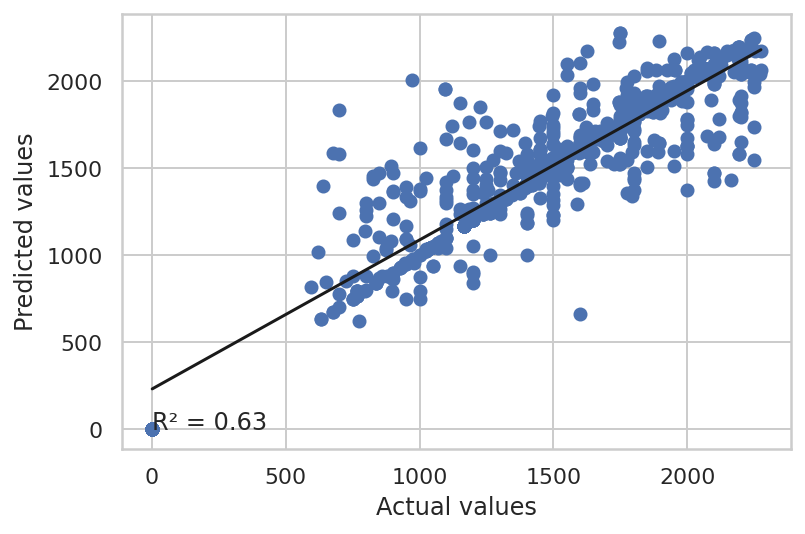

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r_squared = 0.63
plt.scatter(test_y,final_predictions,color="b")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(test_y), np.poly1d(np.polyfit(test_y, final_predictions, 1))(np.unique(test_y)),color="k")

plt.text(0.5, 0.6, 'R\u00B2 = %0.2f' % r_squared)
plt.show()

#### **4. Decision Tree Regressor**

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [ ]:
# seperating X and y
X = housing_final.iloc[:,1:].values
y = housing_final.iloc[:,0].values
pd.DataFrame(X, y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,no info,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,no info,39.6269,-119.708,ca
1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [ ]:
# select state as MA
housing_trees = housing_final.loc[(housing_final['long'].notna()) &(housing_final["lat"].notna())]
decision_df = housing_trees[housing_trees["state"]=="ma"]
decision_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 131449 to 144122
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    3899 non-null   int64  
 1   type                     3899 non-null   object 
 2   sqfeet                   3899 non-null   int64  
 3   beds                     3899 non-null   int64  
 4   baths                    3899 non-null   float64
 5   cats_allowed             3899 non-null   int64  
 6   dogs_allowed             3899 non-null   int64  
 7   smoking_allowed          3899 non-null   int64  
 8   wheelchair_access        3899 non-null   int64  
 9   electric_vehicle_charge  3899 non-null   int64  
 10  comes_furnished          3899 non-null   int64  
 11  laundry_options          3899 non-null   object 
 12  parking_options          3899 non-null   object 
 13  lat                      3899 non-null   float64
 14  long             

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



Text(0.5, 0.98, 'Total Number of Listings (Massachusetts)')

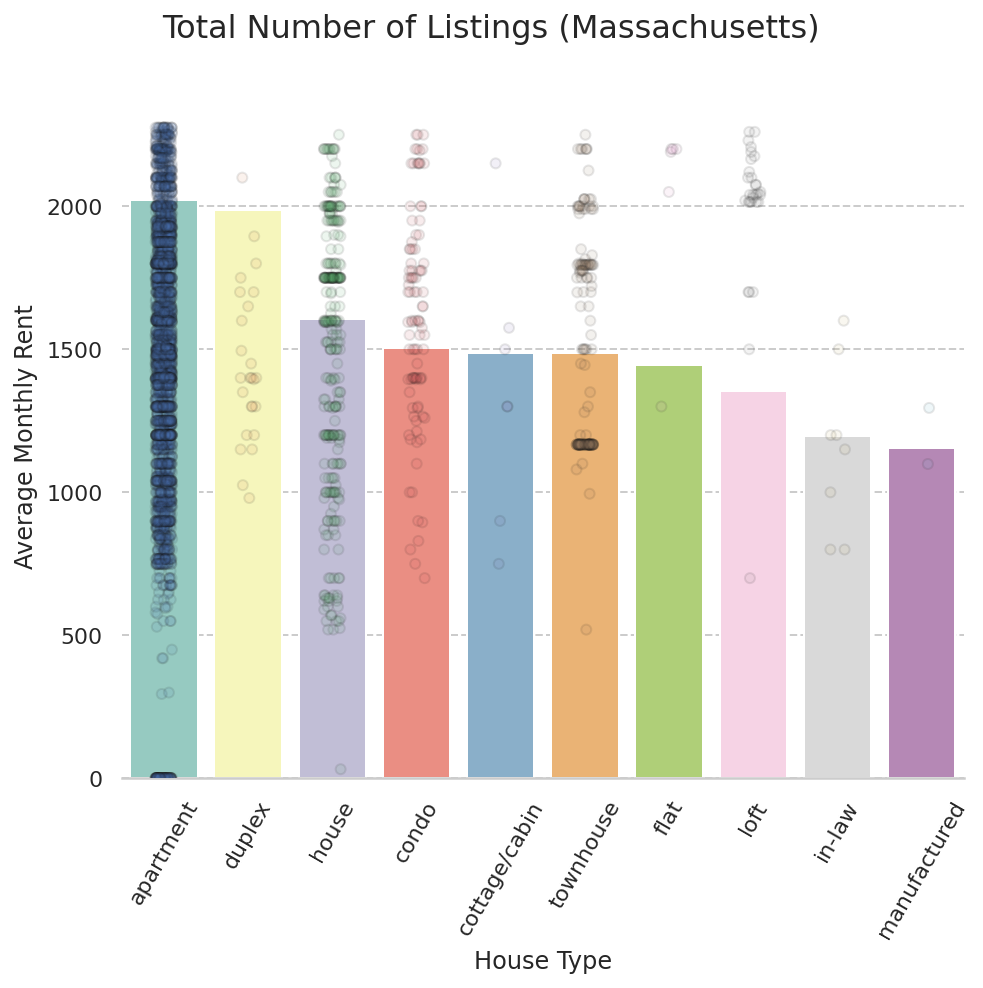

In [ ]:
# barplot of rent in descending order
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

decision_df2 = pd.DataFrame(decision_df.groupby('type')['price'].mean().reset_index()).sort_values(by='price', ascending=False)

g3 = sns.catplot(x='type', y='price', data=decision_df2,
                 kind='bar', palette='Set3', height=7, aspect=1, ci=None);
plt.xticks(rotation=60)
sns.despine(left=True)

g3.map(sns.stripplot, x='type', y='price', data=decision_df,
      palette=sns.color_palette(), dodge=True, alpha=0.1, ec='k', linewidth=1);

g3.set(xlabel='House Type', ylabel='Average Monthly Rent')
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Total Number of Listings (Massachusetts)", fontsize = 16)

In [ ]:
# create train & test data from MA-subset
from sklearn.model_selection import train_test_split
X = decision_df.drop(['price', 'state'], axis=1)
y = decision_df['price'].copy()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=42) #split all
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape) # check sizes
train_X.head(3)

(3119, 14) (780, 14) (3119,) (780,)


,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
142360,apartment,525,1,1.0,1,0,1,0,0,0,laundry in bldg,street parking,42.4591,-71.0695
142846,apartment,1447,3,2.0,1,1,1,0,0,0,no info,no info,42.5596,-71.9126
142864,apartment,300,1,1.0,0,0,0,0,0,0,no laundry on site,no parking,42.5712,-71.9870


In [ ]:
#@title Construct Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='diagram')

num_pipeline = Pipeline([ # for numeric
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([ # for categorical
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder())
    ])

num_attribs = ['sqfeet','beds','baths']
cat_attribs = ['cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','comes_furnished']

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


prep_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
        ("geo", cluster_simil, ["lat", "long"])
    ])

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching


preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(DecisionTreeRegressor(), n_features_to_select=1.0)),
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqfeet', 'beds', 'baths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['cats_allowed',
                                                   'dogs_allowed',
                                                   'smoking_allowed',
                                                   'wheelchair_access',
                                                   'comes_furnished']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['lat', 'long'])])),
                ('select',
                 SequentialFeatureSelector(estimator=DecisionTreeRegressor(),
                                           n_features_to_select=1.0))])

In [ ]:
#@title Process Pipeline
# process all variables thorugh pipeline
processed_X = preprocess_pipeline.fit_transform(train_X, train_y)
df_processed_X = pd.DataFrame(processed_X,
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = train_X.index)
print(df_processed_X.shape)
df_processed_X.head()

(3119, 23)


,num__sqfeet,num__beds,num__baths,cat__cats_allowed_0,cat__cats_allowed_1,cat__dogs_allowed_0,cat__dogs_allowed_1,cat__smoking_allowed_0,cat__smoking_allowed_1,cat__wheelchair_access_0,...,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,geo__Cluster 3 similarity,geo__Cluster 4 similarity,geo__Cluster 5 similarity,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity
142360,-1.254770,-0.927899,-0.496699,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.556169,0.999851,0.083576,0.555270,0.775703,0.401025,0.861514,1.203987e-20,0.521703,0.013399
142846,1.420607,1.470871,1.750153,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.899393,0.484307,0.521585,0.246986,0.837396,0.058670,0.422563,5.782313e-16,0.997158,0.219460
142864,-1.907654,-0.927899,-0.496699,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.874074,0.423679,0.570796,0.213539,0.785661,0.045995,0.369278,1.402391e-15,0.985285,0.262061
141819,0.703885,0.271486,-0.496699,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.548971,0.095306,0.993790,0.084864,0.347501,0.008058,0.115304,5.382510e-13,0.531259,0.659609
140353,1.864569,0.271486,-0.496699,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.541743,0.995920,0.078285,0.593673,0.760734,0.443774,0.887799,7.514683e-21,0.490733,0.011740


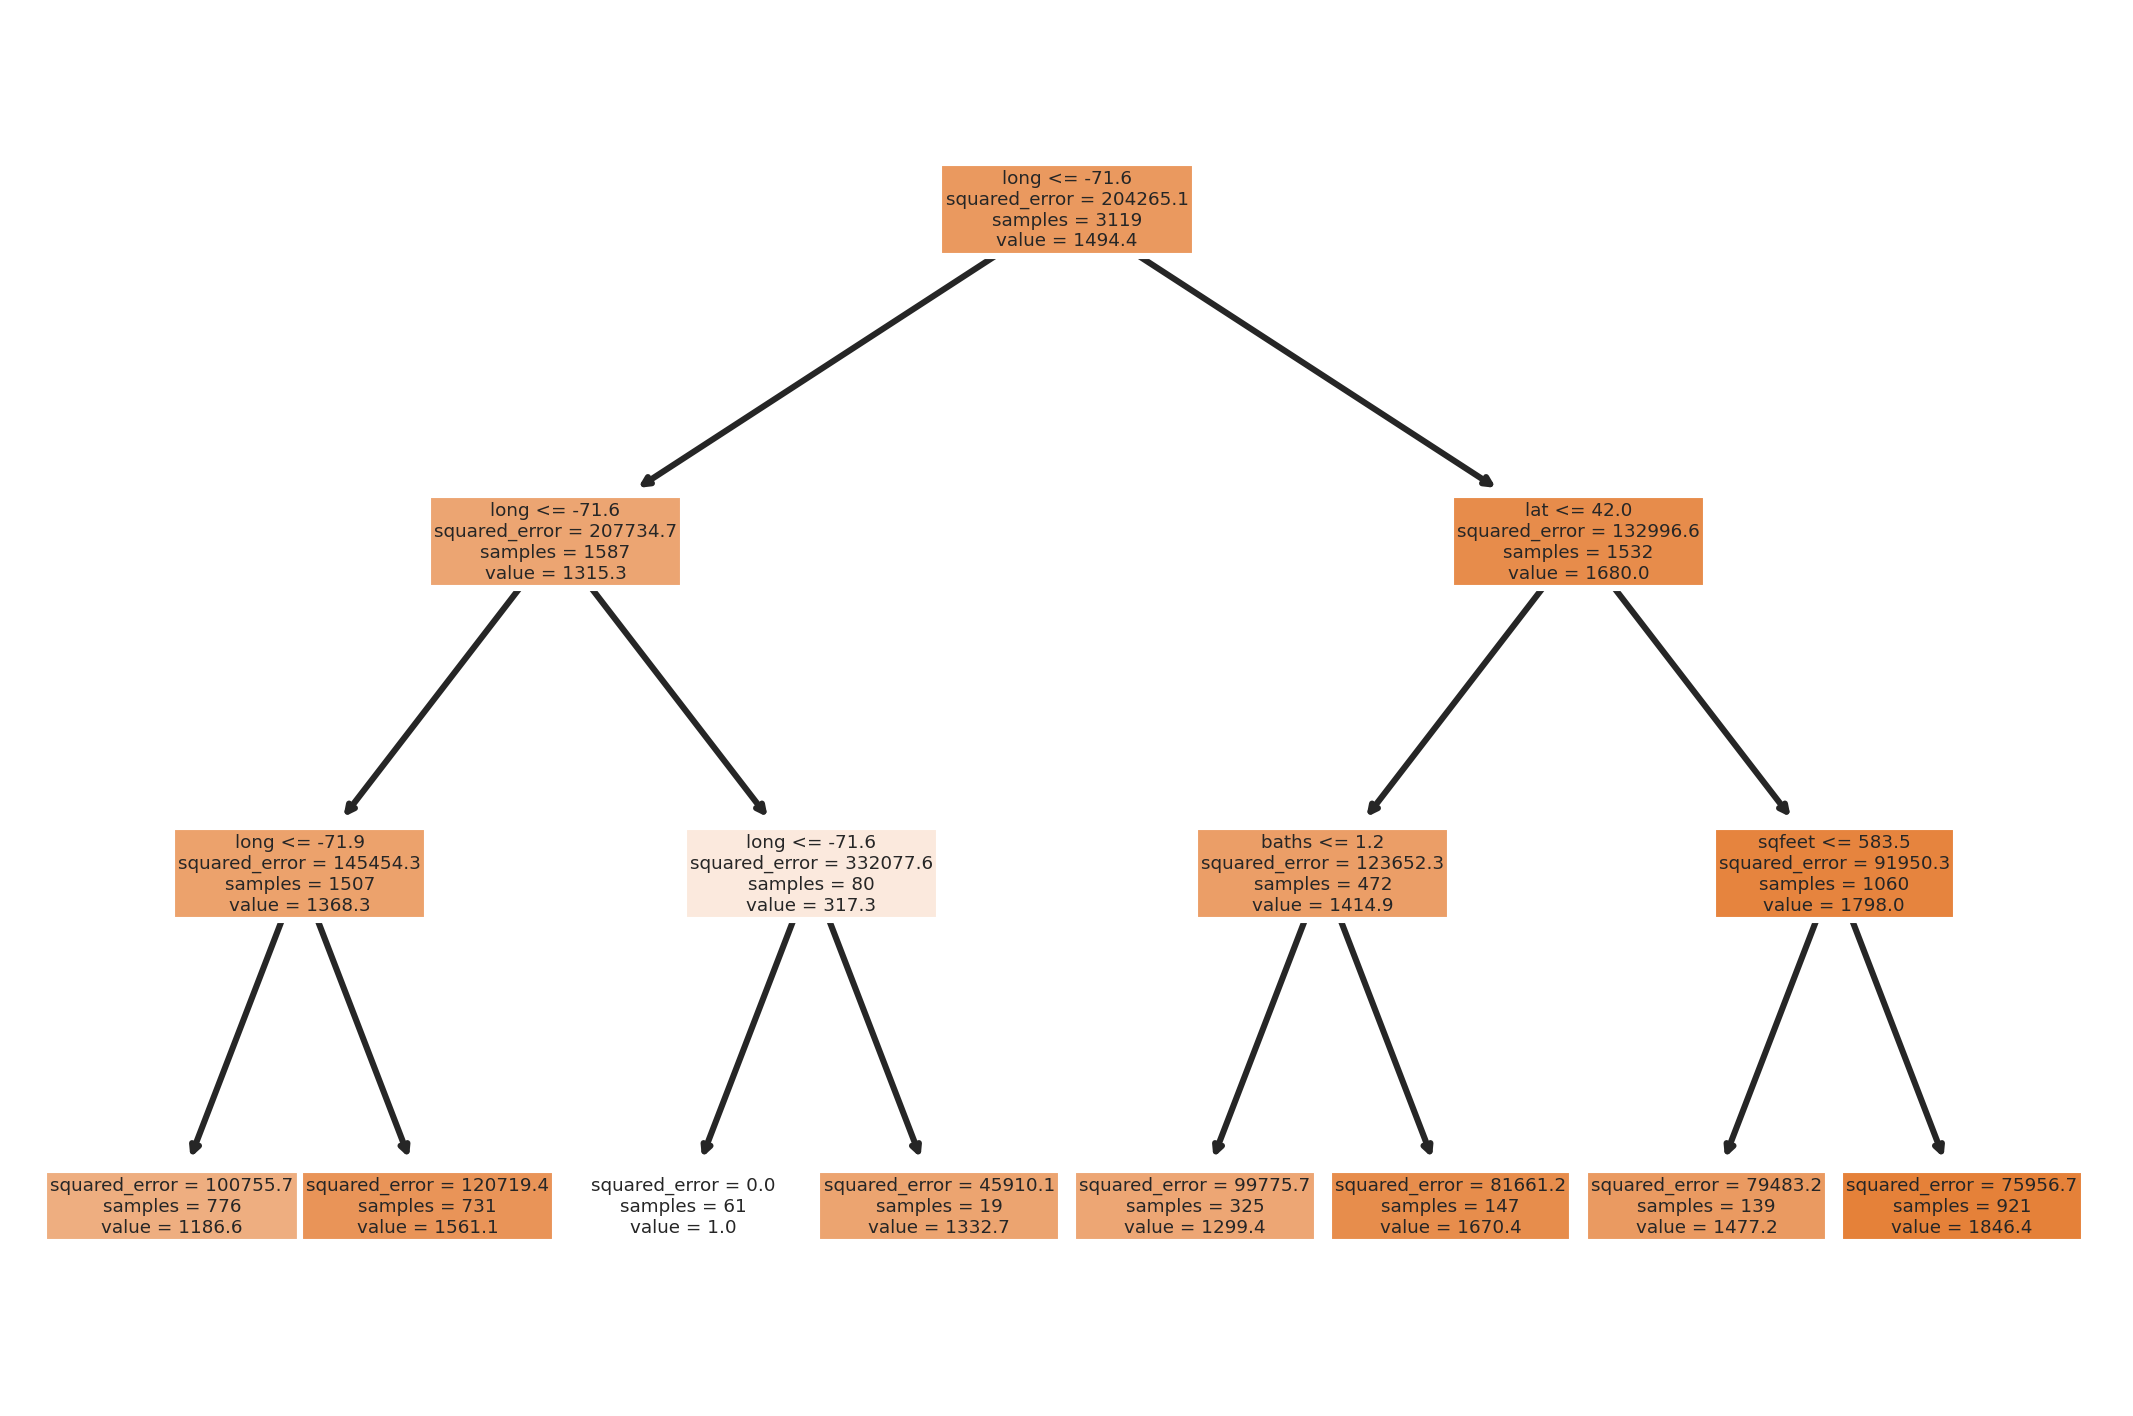

In [ ]:
#@title Visualize Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
train_X = train_X[num_attribs+cat_attribs+["lat", "long"]]
train_y = train_y.copy()

reg = DecisionTreeRegressor(max_depth=3) # maximum of three layers after root (layer 0).
reg.fit(train_X, train_y)
plt.figure(dpi=220) # Makes the figure a little larger, easier to read.
plot_tree(reg, filled=True, feature_names=list(train_X.columns), precision=1); # graphically shows the tree

(1159,)


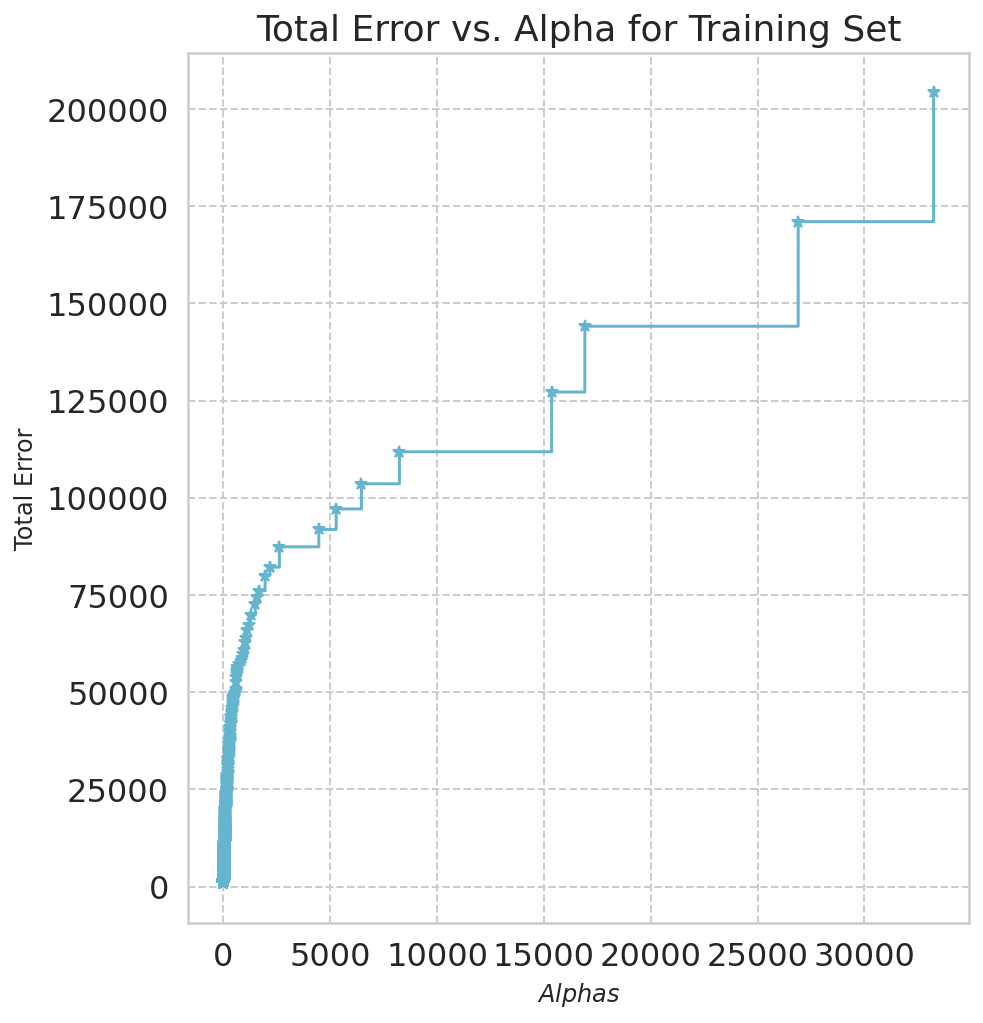

In [ ]:
#@title Training Error vs. Alpha
plt.figure(figsize=(7, 8))
reg_full = DecisionTreeRegressor().fit(train_X, train_y) # learn a new full tree
path = reg_full.cost_complexity_pruning_path(train_X, train_y) # define cost-pruning
reg_ccp_alphas, reg_impurities = path.ccp_alphas, path.impurities # default impurity is Gini
plt.plot(reg_ccp_alphas, reg_impurities, marker='*', drawstyle='steps-post', color='c')
plt.xlabel('$Alphas$'); plt.ylabel('Total Error')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Total Error vs. Alpha for Training Set", fontsize=18)
print(reg_ccp_alphas.shape);

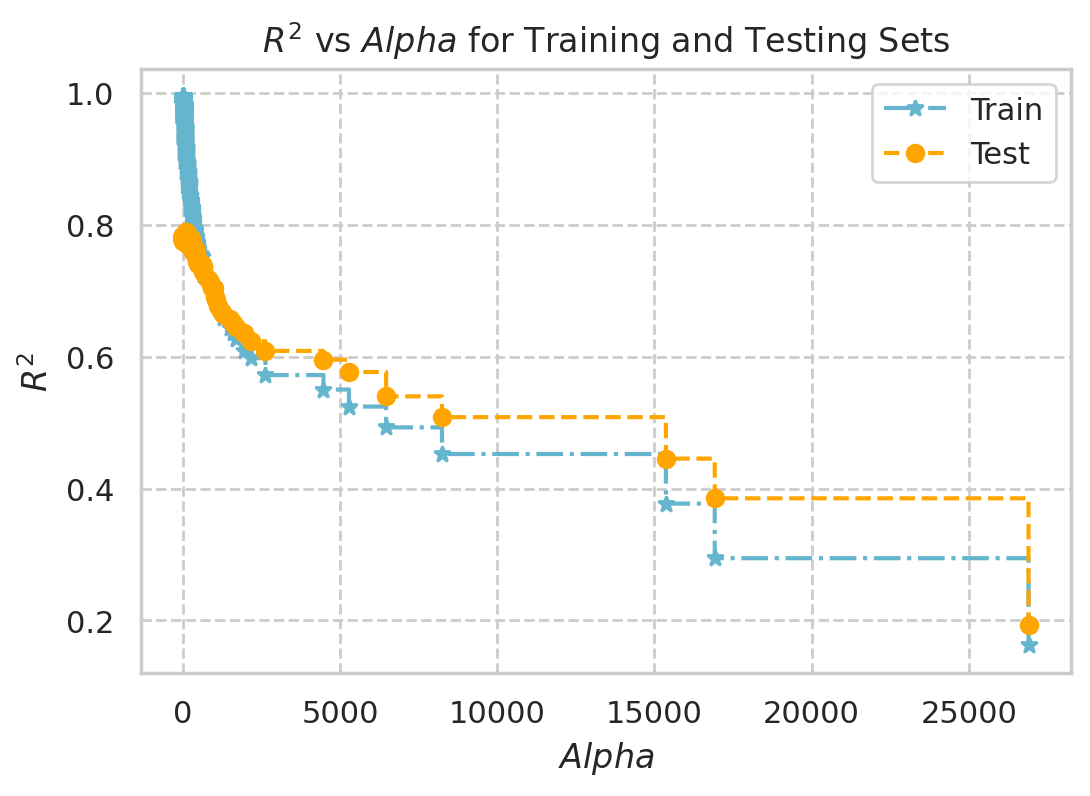

In [ ]:
#@title $R^2$ of Decision Trees on Train & Test
regs = []
for reg_ccp_alpha in reg_ccp_alphas:
    reg_i = DecisionTreeRegressor(random_state=0, ccp_alpha=reg_ccp_alpha)
    reg_i.fit(train_X, train_y)
    regs.append(reg_i)

test_X = test_X[num_attribs+cat_attribs+["lat", "long"]]
test_y = test_y.copy()

reg_train_scores = [reg_i.score(train_X, train_y) for reg_i in regs]
reg_test_scores = [reg_i.score(test_X, test_y) for reg_i in regs]

# plot relationship
fig, ax = plt.subplots(dpi=100)
ax.set_xlabel("$Alpha$")
ax.set_ylabel("$R^2$")
ax.set_title("$R^2$ vs $Alpha$ for Training and Testing Sets")
ax.plot(reg_ccp_alphas[:-1], reg_train_scores[:-1], marker="*", label="Train", drawstyle="steps-post", ls='dashdot', color='c')
ax.plot(reg_ccp_alphas[:-1], reg_test_scores[:-1], marker="o", label="Test", drawstyle="steps-post", ls='--', color='orange')
ax.legend()
plt.show()

In [ ]:
# display GridSearchCV results in descending order and fit training set
from sklearn.model_selection import GridSearchCV

reg_param_grid = {'ccp_alpha': reg_ccp_alphas}  # Just one parameter, no pipeline steps, thus no __ syntax.

reg_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), reg_param_grid, cv=5, scoring='r2')

reg_grid_search.fit(train_X, train_y)
reg_grid_cv_res = pd.DataFrame(reg_grid_search.cv_results_)
reg_grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(reg_grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(3))
display(reg_grid_cv_res.index[0])

,param_ccp_alpha,mean_test_score
1066,170.735236,0.729137
1069,180.375251,0.728757
1070,180.405104,0.728757


1066

In [ ]:
#@title Decision Tree Result
from sklearn.model_selection import cross_val_score

tree_model = reg_grid_search.best_estimator_
test_X = test_X
test_y = test_y.copy()

# fit testing data set
predictions = tree_model.predict(test_X)

# using cross validation
tree_scores = cross_val_score(tree_model, test_X, test_y.values.ravel(),scoring="r2", cv=5)
print("Decision tree has a R2 score of %0.4f with a standard deviation of %0.4f" % (tree_scores.mean(), tree_scores.std()))

Decision tree has a R2 score of 0.5542 with a standard deviation of 0.0843


### **5. Comparison of Results**

Our comparison of results shows that Random Forest Regressor is the best model to use for our case.

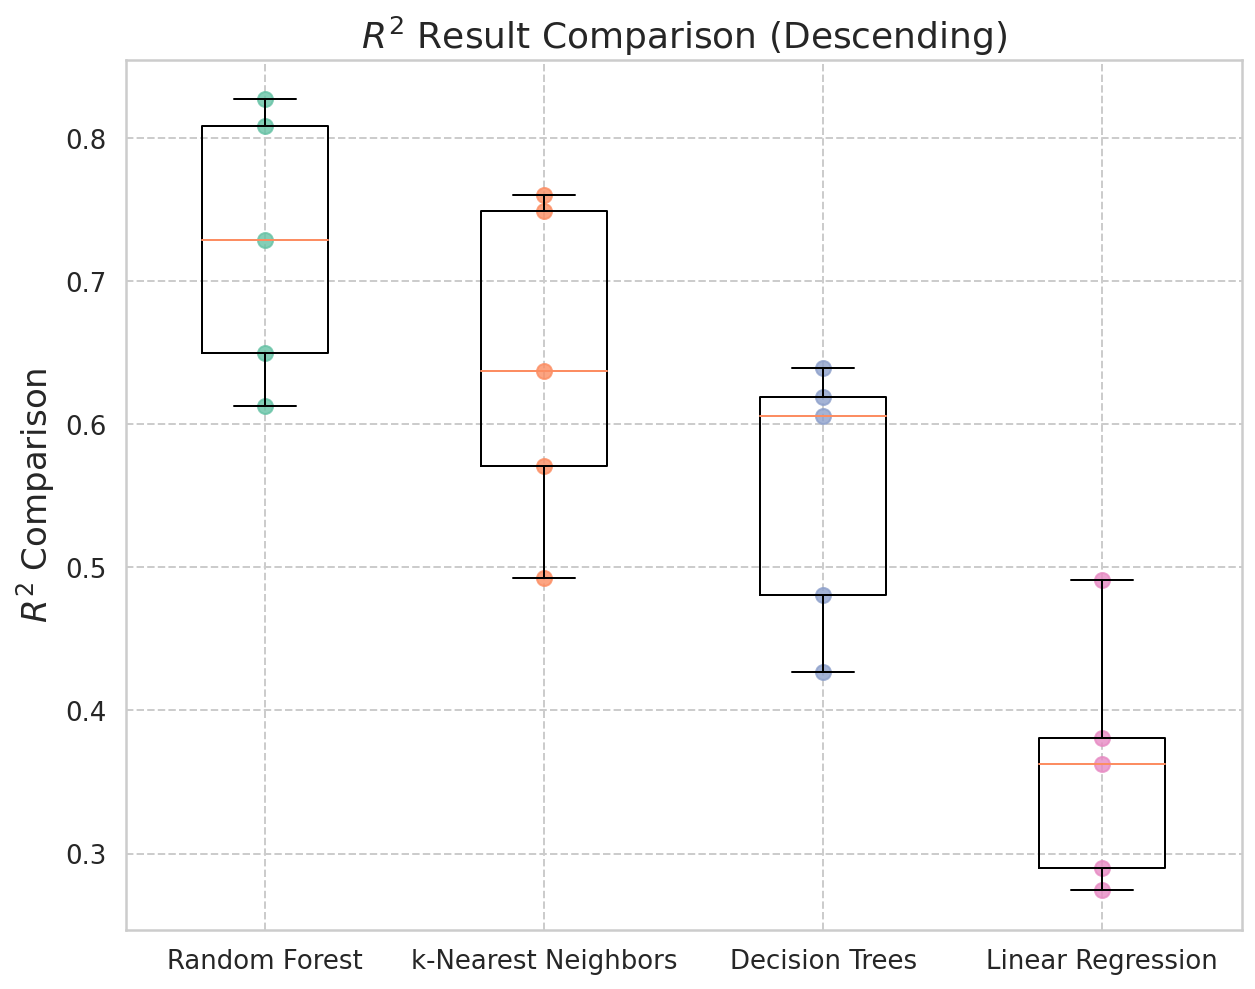

In [ ]:
#@title Visualizing Scoring of Different Models
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_palette("Set2")

plt.figure(figsize=(10, 8))
plt.plot([1]*5, rmf_scores, ".", markersize=15, alpha=.8)
plt.plot([2]*5, knn_scores, ".", markersize=15, alpha=.8)
plt.plot([3]*5, tree_scores, ".", markersize=15, alpha=.8)
plt.plot([4]*5, lr_scores, ".", markersize=15, alpha=.8)

plt.boxplot([rmf_scores, knn_scores, tree_scores, lr_scores],
            labels=("Random Forest", "k-Nearest Neighbors", "Decision Trees", "Linear Regression"))
plt.ylabel("$R^2$ Comparison", fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("$R^2$ Result Comparison (Descending)", fontsize=18)
plt.show()